In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Cluster import Butina

In [3]:
import sys
sys.path.append('../../code')

from utils import binarize_log_data, remove_ambiguous_row, clean_continuous, calculate_circles_quick


In [4]:
raw = pd.read_csv('../../data/raw/ADME_public_set_3521.csv')
raw = raw.dropna(subset=['LOG SOLUBILITY PH 6.8 (ug/mL)'])
solubility = raw['LOG SOLUBILITY PH 6.8 (ug/mL)'].to_list()
smiles = raw['SMILES'].to_list()

(array([ 13.,  33.,  33.,  53.,  26.,  38.,  37.,  21.,  46.,  48.,  52.,
         39.,  66.,  74., 150., 362., 601., 408.,  67.,   6.]),
 array([-1.        , -0.84103678, -0.68207355, -0.52311033, -0.36414711,
        -0.20518388, -0.04622066,  0.11274256,  0.27170579,  0.43066901,
         0.58963223,  0.74859546,  0.90755868,  1.0665219 ,  1.22548512,
         1.38444835,  1.54341157,  1.70237479,  1.86133802,  2.02030124,
         2.17926446]),
 <BarContainer object of 20 artists>)

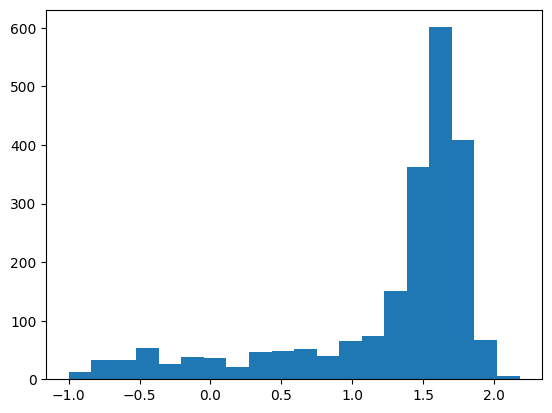

In [5]:
plt.hist(solubility, bins=20)

In [6]:
calculate_circles_quick(smiles)

100%|██████████| 2173/2173 [00:00<00:00, 5607.43it/s]


1763

(array([8.12000e+02, 4.07800e+03, 5.38800e+03, 1.14200e+04, 2.79100e+04,
        6.21540e+04, 1.15770e+05, 1.81506e+05, 2.82716e+05, 3.14474e+05,
        4.47128e+05, 4.15710e+05, 4.65536e+05, 4.23580e+05, 3.81698e+05,
        3.47050e+05, 2.95386e+05, 2.29760e+05, 1.84288e+05, 1.20726e+05,
        1.22700e+05, 7.44100e+04, 5.73080e+04, 3.80820e+04, 2.50080e+04,
        2.48260e+04, 1.51620e+04, 1.05820e+04, 8.12400e+03, 5.44200e+03,
        4.57800e+03, 3.05200e+03, 2.69400e+03, 1.85200e+03, 1.22400e+03,
        1.02400e+03, 8.74000e+02, 7.48000e+02, 6.46000e+02, 3.78000e+02,
        4.90000e+02, 3.30000e+02, 3.20000e+02, 2.50000e+02, 2.36000e+02,
        2.42000e+02, 2.12000e+02, 1.70000e+02, 1.50000e+02, 1.28000e+02,
        2.02000e+02, 1.08000e+02, 9.80000e+01, 1.10000e+02, 9.60000e+01,
        7.20000e+01, 4.40000e+01, 4.20000e+01, 8.00000e+01, 2.60000e+01,
        5.20000e+01, 3.80000e+01, 4.20000e+01, 3.60000e+01, 2.80000e+01,
        2.80000e+01, 3.40000e+01, 2.20000e+01, 2.80

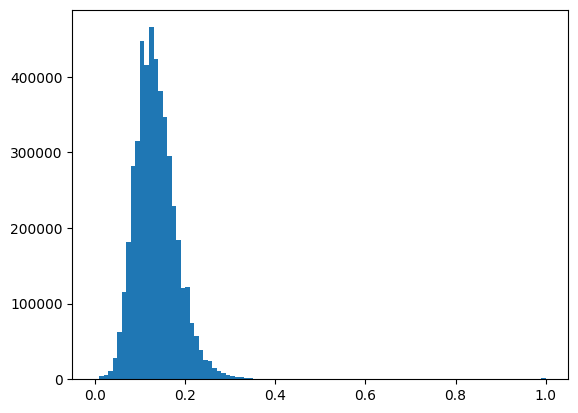

In [11]:
mols = []
for s in smiles:
    mols.append(Chem.MolFromSmiles(s))
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

distances = []
for m in fps:
        sims = DataStructs.BulkTanimotoSimilarity(m, fps)
        distances.extend(sims)
plt.hist(distances, bins=100)